# Trabalho Prático 1 - ICV

### Isadora Cristina de Matos Rodrigues - 2017095740
### Júlia Fonseca de Sena - 2018054508

### Inicialização

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack
import matplotlib.image as mpimg

### Imagem Original

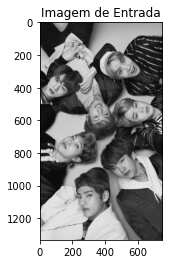

In [2]:
name_archive = 'bts.jpg' #Mudar aqui o nome da imagem de entrada
img = cv2.imread(name_archive,0)
plt.title('Imagem de Entrada')
plt.imshow(img, cmap = 'gray')
plt.show()

### Compressão Psicovisual

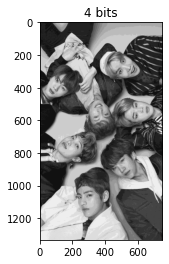

In [3]:
# 4 bits
img_c = img & 0b11110000
plt.title('4 bits')
plt.imshow(img_c, cmap = 'gray')
plt.show()

### DCT

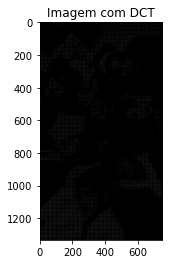

In [4]:
def remove_below_2nd_diag(image): #Zerar elementos abaixo da diagonal secundária (alta frequência)
    return np.rot90(np.tril(np.rot90(image)), 3)

# DCT da imagem
img_c = img_c.astype(float)
img_c = img_c-128
step = 8

size = img_c.shape
DCT = np.zeros(size, dtype=np.float)

for y in range(0,size[0],step):
    for x in range(0,size[1],step):
        dct = fftpack.dct(fftpack.dct(img_c[y:y+step, x:x+step].T, norm='ortho').T, norm='ortho')
        dct = remove_below_2nd_diag(dct)
        DCT[y:y+step, x:x+step] = dct

plt.subplot(121),plt.imshow(DCT, cmap = 'gray', clim=(0, 255))
plt.title('Imagem com DCT')
plt.show()

### IDCT

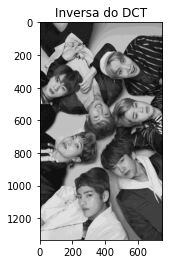

In [5]:
# Inversa do DCT
IDCT = np.zeros(size, dtype=np.float)

for y in range(0,size[0],step):
    for x in range(0,size[1],step):   
        idct = fftpack.idct(fftpack.idct(DCT[y:y+step, x:x+step].T, norm='ortho').T, norm='ortho')
        IDCT[y:y+step, x:x+step] = idct

img_c = img_c+128  
IDCT = IDCT+128

plt.subplot(121),plt.imshow(IDCT, cmap = 'gray', clim=(0, 255))
plt.title('Inversa do DCT')
plt.show()

# Salvamento da imagem comprimida
mpimg.imsave("idct.jpg", IDCT, 0, 255, cmap='gray')

### PSNR e Taxa de Compressão

In [6]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def psnr(predictions, targets):
    rmsev = rmse(predictions, targets)
    return 20 * np.log10(255/rmsev)

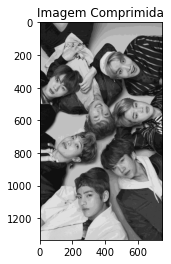

In [7]:
img_new = cv2.imread('idct.jpg', 0)
plt.title('Imagem Comprimida')
plt.imshow(img_new, cmap = 'gray')
plt.show()

In [8]:
print("PSNR:", psnr(img, img_new))

from pathlib import Path
compression_ratio = Path(name_archive).stat().st_size / Path('idct.jpg').stat().st_size

print("Taxa de Compressão:", compression_ratio)

PSNR: 29.66463427378857
Taxa de Compressão: 8.270965873966086
